In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [3]:
# It has reshaped a 28X28 matrix into a row.Each row contain pixel values,except the
# 1st which contains the label.

df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# creating numpy array from pandas dataframe:

data = df.values
# this automatically removes the labels of the columns.

print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [5]:
X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

(42000, 784) (42000,)


In [6]:
# We'll now split the data into test and train.
# Train will be 80% of the data and test will be 20%

split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

33600
(33600, 784) (33600,)
(8400, 784) (8400,)


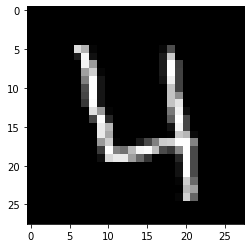

4


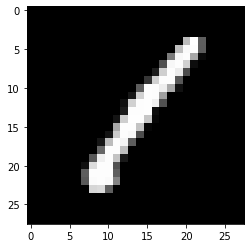

1


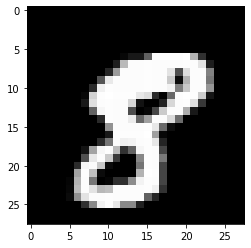

8


In [14]:
# Visualizing some training data

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

drawImg(X_train[3])
print(Y_train[3])
drawImg(X_train[0])
print(Y_train[0])
drawImg(X_train[10])
print(Y_train[10])

# KNN Algorithm:

In [15]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,query_pt,k = 5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(query_pt,X[i])
        vals.append((d,Y[i]))
    
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    
    index = new_vals[1].argmax()
    
    pred = new_vals[0][index]
    return pred

# Make Predictions:

In [17]:
prediction = knn(X_train,Y_train,X_test[10])
print(int(prediction))

3


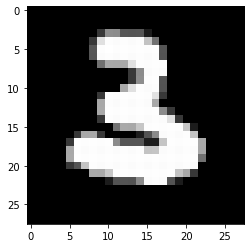

3


In [18]:
drawImg(X_test[10])
print(Y_test[10])

# Accuracy:

In [20]:
import sklearn.metrics as skl

In [ ]:
preds = []
for i in range(X_test.shape[0]):
    preds.append(knn(X_train,Y_train,X_test[i]))
accuracy = skl.accuracy_score(Y_test,preds)
print(accuracy)

In [ ]:
# It was taking a lot of time so I halted the process.I hope this is the correct way
# to calculate accuracy